Mount Google Drive (optional)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
import csv
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# import re
# from bs4 import BeautifulSoup

outputs = {}

In [15]:
class Dense():
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_x, n_y)
                           b -- bias vector of shape (1, n_y)
        """
        sd = np.sqrt(6.0 / (self.n_x + self.n_y))
        np.random.seed(self.seed)
        W = np.random.uniform(-sd, sd, (self.n_y, self.n_x)).T      # the transpose here is just for the code to be compatible with the old codes
        b = np.zeros((1, self.n_y))

        assert(W.shape == (self.n_x, self.n_y))
        assert(b.shape == (1, self.n_y))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data) with the shape (n, f^[l-1])
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter with the shape (n, f^[l])
        """

        # GRADED FUNCTION: linear_forward
        ### START CODE HERE ###
        w = self.parameters["W"]
        b = self.parameters["b"]
        Z = np.dot(A, w) + b
        self.cache = (A, w, b)
        ### END CODE HERE ###

        assert(Z.shape == (A.shape[0], self.parameters["W"].shape[1]))

        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the loss with respect to the linear output (of current layer l), same shape as Z
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the loss with respect to W (current layer l), same shape as W
        self.db -- Gradient of the loss with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[0]

        # GRADED FUNCTION: linear_backward
        ### START CODE HERE ###
        self.dW = np.dot(A_prev.T, dZ) / m
        self.db = np.sum(dZ, axis=0, keepdims=True) / m
        dA_prev = np.dot(dZ, W.T)
        ### END CODE HERE ###

        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)

        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent

        Arguments:
        learning rate -- step size
        """

        # GRADED FUNCTION: linear_update_parameters
        ### START CODE HERE ###
        self.parameters["W"] = self.parameters["W"] - learning_rate * self.dW
        self.parameters["b"] = self.parameters["b"] - learning_rate * self.db
        ### END CODE HERE ###

In [16]:
class Activation():
    def __init__(self, activation_function, loss_function):
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.cache = None

    def forward(self, Z):
        if self.activation_function == "sigmoid":
            """
            Implements the sigmoid activation in numpy

            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of sigmoid(z), same shape as Z
            """

            # GRADED FUNCTION: sigmoid_forward
            ### START CODE HERE ###
            A = 1 / (1 + np.exp(-Z))
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z

            """

            # GRADED FUNCTION: relu_forward
            ### START CODE HERE ###
            A = np.maximum(0, Z)
            self.cache = Z
            ### END CODE HERE ###

            assert(A.shape == Z.shape)

            return A
        elif self.activation_function == "softmax":
            """
            Implements the softmax activation in numpy

            Arguments:
            Z -- np.array with shape (n, C)
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of softmax(z), same shape as Z
            """

            # GRADED FUNCTION: softmax_forward
            ### START CODE HERE ###
            eZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
            A = eZ / np.sum(eZ, axis=1, keepdims=True)
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "linear":
            """
            Linear activation (returns Z directly).
            """
            self.cache = Z.copy()
            return Z

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")


    def backward(self, dA=None, Y=None):
        if self.activation_function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: sigmoid_backward
            ### START CODE HERE ###
            Z = self.cache
            sigmoid = 1 / (1 + np.exp(-Z))
            dZ = dA * sigmoid * (1 - sigmoid)
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: relu_backward
            ### START CODE HERE ###
            Z = self.cache
            dZ = np.array(dA, copy=True)
            dZ[Z <= 0] = 0
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "softmax":
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """

            # GRADED FUNCTION: softmax_backward
            ### START CODE HERE ###
            Z = self.cache
            softmax = np.exp(Z - np.max(Z, axis=1, keepdims=True))
            softmax = softmax / np.sum(softmax, axis=1, keepdims=True)
            dZ = softmax - Y
            ### END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ

        elif self.activation_function == "linear":
            """
            Backward propagation for linear activation.
            """
            return dA

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")

In [17]:
class Model():
    def __init__(self, units, activation_functions, loss_function):
        self.units = units
        self.activation_functions = activation_functions
        self.loss_function = loss_function
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Initialize layers of the neural network

        Arguments:
            self.units -- array defining network structure (e.g., [4,4,1]):
                - Input layer: 4 nodes
                - Hidden layer: 4 nodes
                - Output layer: 1 node
            self.activation_functions -- activation function for each layer (e.g., ["relu","sigmoid"]):
                - First layer uses ReLU
                - Second layer uses Sigmoid
            self.loss_function -- loss function type: "cross_entropy" or "mse"
        """
        self.linear = []        # Store all Dense layers (weights & biases)
        self.activation = []    # Store all activation function layers

        for i in range(len(self.units)-1):
            dense = Dense(self.units[i], self.units[i+1], i)
            self.linear.append(dense)

        for i in range(len(self.activation_functions)):
            self.activation.append(Activation(self.activation_functions[i], self.loss_function))

    def forward(self, X):
        """
        Forward propagation through the network

        Arguments:
        X -- input data: shape (n, f)
        Returns:
        A -- model output:
            - For binary classification: probability (0-1)
            - For multi-class: probability distribution across classes
            - For regression: predicted values
        """
        A = X

        # GRADED FUNCTION: model_forward
        ### START CODE HERE ###
        for i in range(len(self.linear)):
          Z = self.linear[i].forward(A) # forward
          A = self.activation[i].forward(Z) # activation
        ### END CODE HERE ###

        return A

    def backward(self, AL=None, Y=None):
        """
        Backward propagation to compute gradients

        Arguments:
            AL -- model output from forward propagation:
                - For binary: probability (n,1)
                - For multi-class: probabilities (n,C)
            Y -- true labels:
                - For binary: 0/1 labels (n,1)
                - For multi-class: one-hot vectors (n,C)
                - For regression: true values (n,1)

        Returns:
            dA_prev -- gradients for previous layer's activation
        """

        L = len(self.linear)
        C = Y.shape[1]

        # assertions
        warning = 'Warning: only the following 3 combinations are allowed! \n \
                    1. binary classification: sigmoid + cross_entropy \n \
                    2. multi-class classification: softmax + cross_entropy \n \
                    3. regression: linear + mse'
        assert self.loss_function in ["cross_entropy", "mse"], "you're using undefined loss function!"
        if self.loss_function == "cross_entropy":
            if Y.shape[1] == 1:  # binary classification
                assert self.activation_functions[-1] == 'sigmoid', warning
            else:  # multi-class classification
                assert self.activation_functions[-1] == 'softmax', warning
                assert self.units[-1] == Y.shape[1], f"you should set last dim to {Y.shape[1]}(the number of classes) in multi-class classification!"
        elif self.loss_function == "mse":
            assert self.activation_functions[-1] == 'linear', warning
            assert self.units[-1] == Y.shape[1], "output dimension mismatch for regression!"

        # GRADED FUNCTION: model_backward
        ### START CODE HERE ###
        dAL = 0.0
        # Initializing the backpropagation
        if self.loss_function == "cross_entropy":
          dAL = (-1 * (Y / (AL + 0.00001))) + ((1 - Y) / (1 - AL + 0.00001))
        elif self.loss_function == "mse":
          dAL = AL - Y

        if self.activation_functions[-1] == "linear":
          # Lth layer (LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
          dZ = dAL
          dA_prev = self.linear[-1].backward(dZ)

        elif self.activation_functions[-1] == "sigmoid":
          # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
          dZ = self.activation[-1].backward(dAL)
          dA_prev = self.linear[-1].backward(dZ)

        elif self.activation_functions[-1] == "softmax":
          dZ = self.activation[-1].backward(Y=Y)
          dA_prev = self.linear[-1].backward(dZ)

        # Loop from l=L-2 to l=0
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "dA_prev". Outputs: "dA_prev"
        for l in reversed(range(L - 1)):
          dZ = self.activation[l].backward(dA_prev)
          dA_prev = self.linear[l].backward(dZ)
        ### END CODE HERE ###

        return dA_prev

    def update(self, learning_rate):
        """
        Arguments:
        learning_rate -- step size
        """

        L = len(self.linear)

        # GRADED FUNCTION: model_update_parameters
        ### START CODE HERE ###
        for l in self.linear:
          l.update(learning_rate)
        ### END CODE HERE ###

In [18]:
def compute_MSE_loss(AL, Y):
    # 檢查 AL 和 Y 是否有 NaN 或無效值
    if np.any(np.isnan(AL)) or np.any(np.isnan(Y)):
        raise ValueError("AL or Y contains NaN values!")
    if np.any(np.isinf(AL)) or np.any(np.isinf(Y)):
        raise ValueError("AL or Y contains Inf values!")

    # 防止 m 為 0
    m = Y.shape[0]
    if m == 0:
        raise ValueError("Number of samples (m) is zero, cannot compute loss.")

    # 計算 MSE loss
    loss = (1 / m) * np.sum(np.square(AL - Y))
    return loss

# compute_MSE_loss (MSE)
def compute_MSE_loss(AL, Y):
    m = Y.shape[0]
    loss = (1/m) * np.sum(np.square(AL - Y))
    return loss

In [19]:
# def predict(x, y_true, model):
#     """
#     This function is used to predict the results of a  L-layer neural network.

#     Arguments:
#     x -- data set of examples you would like to label
#     model -- trained model

#     Returns:
#     y_pred -- predictions for the given dataset X
#     """

#     n = x.shape[0]

#     # Forward propagation
#     y_pred = model.forward(x)

#     # this transform the output and label of binary classification when using sigmoid + cross entropy for evaluation
#     # eg. y_pred: [[0.8], [0.2], [0.1]] -> [[0.2, 0.8], [0.8, 0.2], [0.9, 0.1]]
#     # eg. y_true: [[1], [0], [0]] -> [[0, 1], [1, 0], [1, 0]]
#     if y_pred.shape[-1] == 1:
#         y_pred = np.array([[1 - y[0], y[0]] for y in y_pred])
#         if y_true is not None:
#             y_true = np.array([[1,0] if y == 0 else [0,1] for y in y_true.reshape(-1)])

#     # make y_pred/y_true become one-hot prediction result
#     # eg. y_true: [[1, 0, 0], [0, 0, 1], [0, 1, 0]] -> [0, 2, 1]
#     # eg. y_pred: [[0.2, 0.41, 0.39], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]] -> [1, 1, 2]
#     if y_true is not None:
#         y_true = np.argmax(y_true, axis=1)
#     y_pred = np.argmax(y_pred, axis=1)

#     if y_true is not None:
#         # compute accuracy
#         correct = 0
#         for yt, yp in zip(y_true, y_pred):
#             if yt == yp:
#                 correct += 1
#         print(f"Accuracy: {correct/n * 100:.2f}%")

#         # f1_scores = f1_score(y_true, y_pred, average=None)
#         # print(f'f1 score for each class: {f1_scores}')
#         # print(f'f1_macro score: {np.mean(np.array(f1_scores)):.2f}')
#         MAPE = calculate_MAPE(y_pred, y_true)
#         print(f"MAPE: {MAPE}")

#     return y_pred

def save_prediction_data(predicted_y):
    # Create DataFrame with ID, x, and y columns
    df = pd.DataFrame({
        'ID': range(len(predicted_y)),  # Add ID column starting from 0
        'y': predicted_y
    })

    # Ensure ID is the first column
    df = df[['ID', 'y']]

    # Save to CSV file
    df.to_csv('Lab4_basic_regression.csv', index=False)
    print("Prediction data saved as 'Lab4_basic_regression.csv'")

def animate_training(history, X_train, Y_train):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 11)
    ax.set_ylim(-5, 5)
    line, = ax.plot([], [], 'b-', lw=1, label='Predicted')

    ground_truth_x = X_train.flatten()
    ground_truth_y = Y_train.flatten()
    ax.plot(ground_truth_x, ground_truth_y, 'r-', lw=1, label='Ground Truth')

    # show current epoch on the animation / 100 epoch
    epoch_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    def init():
        line.set_data([], [])
        epoch_text.set_text('')
        return line, epoch_text

    def update(frame):
        epoch = (frame + 1) * 100
        _, predicted_y = history[frame]
        predicted_x = X_train.flatten()
        line.set_data(predicted_x, predicted_y.flatten())

        epoch_text.set_text(f'Epoch: {epoch}')

        return line, epoch_text

    ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=True, interval=50)

    # save as gif
    ani.save('Lab4_basic_regression.gif', writer='pillow')
    plt.close(fig)
    print(f"Animation saved as 'Lab4_basic_regression.gif'")


def save_final_result(model, X_train, Y_train):
    AL = model.forward(X_train)

    predicted_x = X_train.flatten()
    predicted_y = AL.flatten()

    plt.plot(predicted_x, predicted_y, 'b-', label="Predicted", lw=1)

    ground_truth_x = X_train.flatten()
    ground_truth_y = Y_train.flatten()

    save_prediction_data(predicted_y)

    plt.plot(ground_truth_x, ground_truth_y, 'r-', label='Ground Truth', lw=1)

    plt.legend()

    plt.ylim(-5, 5)
    plt.xlim(0, 11)
    plt.savefig("Lab4_basic_regression.jpg")
    plt.show()
    print("Prediction saved as 'Lab4_basic_regression.jpg'")



In [20]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (n, f^{0})
    Y -- true "label" vector, of shape (n, C)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]                  # number of training examples
    mini_batches = []
    ### START CODE HERE ###

    # Step 1: Shuffle (X, Y)
    # permutation = list(np.random.permutation(m))
    # shuffled_X = X[permutation, :]
    # shuffled_Y = Y[permutation, :]

    permutation = np.random.permutation(m)
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        # mini_batch_X = shuffled_X[k * mini_batch_size : m - 1]
        # mini_batch_Y = shuffled_Y[k * mini_batch_size : m - 1]
        # mini_batch = (mini_batch_X, mini_batch_Y)
        # mini_batches.append(mini_batch)

    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    ### END CODE HERE ###

    return mini_batches

def train_model(model, X_train, Y_train, learning_rate, num_iterations, batch_size=None, print_loss=True, print_freq=1000, decrease_freq=100, decrease_proportion=0.99):
    """
    Trains the model using mini-batch gradient descent

    Arguments:
    model -- the model to be trained
    X_train -- training set, of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels, of shape (1, m_train)
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    batch_size -- size of a mini batch
    print_loss -- if True, print the loss every print_freq iterations
    print_freq -- print frequency
    decrease_freq -- learning rate decrease frequency
    decrease_proportion -- learning rate decrease proportion

    Returns:
    model -- the trained model
    losses -- list of losses computed during the optimization
    history -- list of (X_train, Y_pred) tuples for visualization
    """

    history = []
    losses = []

    for i in range(num_iterations):
        ### START CODE HERE ###
        # Define mini batches
        mini_batches = [(X_train, Y_train)]
        if batch_size:
            mini_batches = random_mini_batches(X_train, Y_train, batch_size)
        else:
            # if batch_size is None, batch is not used, mini_batch = whole dataset
            mini_batches = [(X_train, Y_train)]

        epoch_loss = 0
        for batch in mini_batches:
            X_batch, Y_batch = batch

            # Forward pass
            AL = model.forward(X_batch)

            # Compute loss
            # if model.loss_function == 'cross_entropy':
            #     if model.activation_functions[-1] == "sigmoid": # Binary classification
            #         loss = compute_BCE_loss(AL, Y_batch)
            #     elif model.activation_functions[-1] == "softmax": # Multi-class classification
            #         loss = compute_CCE_loss(AL, Y_batch)
            # elif model.loss_function == 'mse': # Regression
            #     loss = compute_MSE_loss(AL, Y_batch)
            loss = compute_MSE_loss(AL, Y_batch)
            epoch_loss += loss

            # Backward pass
            model.backward(AL, Y_batch)

            # Update parameters
            model.update(learning_rate)

        epoch_loss /= len(mini_batches)
        losses.append(epoch_loss)
        ### END CODE HERE ###

        # Print loss
        if print_loss and i % print_freq == 0:
            print(f"Loss after iteration {i}: {epoch_loss}")

        # Store history
        if i % 100 == 0:
            history.append((X_train, model.forward(X_train)))

        # Decrease learning rate
        if i % decrease_freq == 0 and i > 0:
            learning_rate *= decrease_proportion

    return model, losses, history


In [21]:
# def preprocessor(text):
#     # remove HTML tags
#     text = BeautifulSoup(text, 'html.parser').get_text()

#     # regex for matching emoticons, keep emoticons, ex: :), :-P, :-D
#     r = '(?::|;|=|X)(?:-)?(?:\)|\(|D|P)'
#     emoticons = re.findall(r, text)
#     text = re.sub(r, '', text)

#     # convert to lowercase and append all emoticons behind (with space in between)
#     # replace('-','') removes nose of emoticons
#     text = re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-','')
#     return text

# nltk.download('stopwords')
# stop = stopwords.words('english')

# def tokenizer_stem_nostop(text):
#     porter = PorterStemmer()
#     return [porter.stem(w) for w in re.split('\s+', text.strip()) \
#             if w not in stop and re.match('[a-zA-Z]+', w)]


In [22]:
def preProcessed(x, y):
    y = y[:, np.newaxis]
    combined = np.hstack((x, y))
    nan_removed = combined[~np.isnan(combined).any(axis=1)]
    x_train = nan_removed[:, :-1]
    y_train = nan_removed[:, -1:]
    # scaler = StandardScaler()
    # x_train = scaler.fit_transform(x_train)
    # y_train = scaler.fit_transform(y_train)
    x_train[:, 0] = np.where(x_train[:, 0] > 0, np.log10(x_train[:, 0].clip(min=1e-10)), x_train[:, 0])
    x_train[:, 1] = np.where(x_train[:, 1] > 0, np.log10(x_train[:, 1].clip(min=1e-10)), x_train[:, 1])
    x_train[:, 2] = np.where(x_train[:, 2] > 0, np.log10(x_train[:, 2].clip(min=1e-10)), x_train[:, 2])
    y_train[:, 0] = np.where(y_train[:, 0] > 0, np.log10(y_train[:, 0].clip(min=1e-10)), y_train[:, 0])
    # x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
    # y_train = (y_train - np.mean(y_train)) / np.std(y_train)
    return x_train, y_train

In [23]:
def split_data(X_train, Y_train, split_ratio=0.2):

    x_split_size = int(len(X_train) * split_ratio)
    y_split_size = int(len(Y_train) * split_ratio)
    x_train = X_train[x_split_size:]
    y_train = Y_train[y_split_size:]
    x_val = X_train[:x_split_size]
    y_val = Y_train[:y_split_size]

    return x_train, y_train, x_val, y_val


In [24]:
# load training data
data_root = "out.csv"
with open(data_root, newline='') as csvfile:
    datalist = pd.read_csv(data_root)

In [25]:
# count = CountVectorizer(ngram_range=(1, 1),
#                         preprocessor=preprocessor,
#                         tokenizer=tokenizer_stem_nostop)
# datal = datalist.to_numpy()
# count.fit(datal[:,7])
# BoW = count.vocabulary_
# print('[vocabulary]\n{}'.format(BoW))
# doc_bag = count.transform(datal[:,7])
# doc_bag = doc_bag.toarray()
# print(doc_bag)

In [26]:
# # filtered_data = datalist[(datalist["followers"] > 10000) & (datalist["followers"] < 1000000)]
# # data_isVideo = filtered_data[filtered_data["is Photo"] == 0]
# data_isVideo = datalist[(datalist["followers"] > 10) & (datalist["followers"] < 10000) & (datalist["is Video"] == 1)]
# # xy = filtered_data[[ "followers","is Photo", "hashtag_count", "days_diff", "Like Count"]].to_numpy()
# xy_isVideo = data_isVideo[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

# x_isVideo = xy_isVideo[:, :-1]
# y_isVideo = xy_isVideo[:, -1]
# x_processed_isVideo, y_processed_isVideo = preProcessed(x_isVideo, y_isVideo)
# x_train_isVideo, y_train_isVideo, x_val_isVideo, y_val_isVideo = split_data(x_processed_isVideo, y_processed_isVideo, split_ratio=0.2)
# print(f"x_train shape: {x_train_isVideo.shape}, y_train shape: {y_train_isVideo.shape}")
# print(f"x_val shape: {x_val_isVideo.shape}, y_val shape: {y_val_isVideo.shape}")

# loss_function = "mse";
# layers_dims = [x_train_isVideo.shape[-1], 32, 16, 1] # linear for converge, sigmoid for diverge
# activation_fn = ["relu", "relu", "linear"]
# learning_rate = 0.05
# num_iterations = 50000
# print_loss = True
# print_freq = 1000
# decrease_freq = 1000
# decrease_proportion = 0.9
# batch_size = 16

# model_isVideo = Model(layers_dims, activation_fn, loss_function)
# model_isVideo, losses, history = train_model(model_isVideo, x_train_isVideo, y_train_isVideo, learning_rate, num_iterations, batch_size, print_loss, print_freq, decrease_freq, decrease_proportion)

# # Plot the loss
# plt.figure(figsize=(5, 3))
# plt.plot(losses)
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.title(f'Training Loss (Initial LR: {learning_rate})')
# plt.show()

In [27]:
# # data_isPhoto = filtered_data[filtered_data["is Photo"] == 1]
# data_isPhoto = datalist[(datalist["followers"] > 10000) & (datalist["followers"] < 1000000) & (datalist["is Photo"] == 1)]
# xy_isPhoto = data_isPhoto[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

# x_isPhoto = xy_isPhoto[:, :-1]
# y_isPhoto = xy_isPhoto[:, -1]
# x_processed_isPhoto, y_processed_isPhoto = preProcessed(x_isPhoto, y_isPhoto)
# x_train_isPhoto, y_train_isPhoto, x_val_isPhoto, y_val_isPhoto = split_data(x_processed_isPhoto, y_processed_isPhoto, split_ratio=0.2)
# print(f"x_train shape: {x_train_isPhoto.shape}, y_train shape: {y_train_isPhoto.shape}")
# print(f"x_val shape: {x_val_isPhoto.shape}, y_val shape: {y_val_isPhoto.shape}")

# loss_function = "mse";
# layers_dims = [x_train_isPhoto.shape[-1], 32, 16, 1] # linear for converge, sigmoid for diverge
# activation_fn = ["relu", "relu", "linear"]
# learning_rate = 0.05
# num_iterations = 20000
# print_loss = True
# print_freq = 1000
# decrease_freq = 1000
# decrease_proportion = 0.9
# batch_size = 16

# model_isPhoto = Model(layers_dims, activation_fn, loss_function)
# model_isPhoto, losses, history = train_model(model_isPhoto, x_train_isPhoto, y_train_isPhoto, learning_rate, num_iterations, batch_size, print_loss, print_freq, decrease_freq, decrease_proportion)

# # Plot the loss
# plt.figure(figsize=(5, 3))
# plt.plot(losses)
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.title(f'Training Loss (Initial LR: {learning_rate})')
# plt.show()

In [28]:
def calculate_MAPE(prediction, ground_truth):
    ground_truth = np.where(ground_truth == 0, np.finfo(float).eps, ground_truth) # ensure no 0 in nparray
    mape = np.sum(np.abs((ground_truth - prediction) / ground_truth)) / len(prediction) * 100
    return mape

def predict(x, y_true, model):
    # 預測
    y_pred = model.forward(x)

    if y_true is not None:
        # Mean Squared Error
        mse = np.mean(np.square(y_pred - y_true))
        print(f"MSE : {mse}")

        # Mean Absolute Error
        mae = np.mean(np.abs(y_pred - y_true))
        print(f"MAE : {mae}")

        mape = calculate_MAPE(y_true, y_pred)
        print(f"MAPE {mape:.2f}%")

        # Accuracy (within tolerance)
        # tolerance = 1e-3
        # correct = np.sum(np.isclose(y_pred.flatten(), y_true.flatten(), atol=tolerance))
        # accuracy = correct / len(y_true) * 100
        # print(f"Accuracy (within tolerance of {tolerance}): {accuracy:.2f}%")

    return y_pred


In [29]:
# # load validation data
# data_val_root = "out.csv"
# with open(data_val_root, newline='') as csvfile:
#     datalist_val = pd.read_csv(data_val_root)

# filtered_data_val = datalist_val[(datalist_val["followers"] > 10000) & (datalist_val["followers"] < 1000000)]
# data_val_isVideo = filtered_data_val[filtered_data_val["is Photo"] == 0]
# xy_val_isVideo = data_val_isVideo[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

# x_val_isVideo = xy_val_isVideo[:, :-1]
# y_val_isVideo = xy_val_isVideo[:, -1]
# x_val_processed_isVideo, y_processed_isVideo = preProcessed(x_isVideo, y_isVideo)

# data_val_isPhoto = filtered_data_val[filtered_data_val["is Photo"] == 1]
# xy_val_isPhoto = data_val_isPhoto[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

# x_val_isPhoto = xy_val_isPhoto[:, :-1]
# y_val_isPhoto = xy_val_isPhoto[:, -1]
# x_val_processed_isPhoto, y_processed_isPhoto = preProcessed(x_isPhoto, y_isPhoto)

In [30]:
data_isPhoto = datalist[(datalist["is Photo"] == 1)]
xy_isPhoto = data_isPhoto[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

x_isPhoto = xy_isPhoto[:, :-1]
y_isPhoto = xy_isPhoto[:, -1]
x_processed_isPhoto, y_processed_isPhoto = preProcessed(x_isPhoto, y_isPhoto)
print(f"x_train shape: {x_processed_isPhoto.shape}, y_train shape: {y_processed_isPhoto.shape}")

data_isVideo = datalist[(datalist["is Video"] == 1)]
xy_isVideo = data_isVideo[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

x_isVideo = xy_isVideo[:, :-1]
y_isVideo = xy_isVideo[:, -1]
x_processed_isVideo, y_processed_isVideo = preProcessed(x_isVideo, y_isVideo)
print(f"x_train shape: {x_processed_isVideo.shape}, y_train shape: {y_processed_isVideo.shape}")

x_train shape: (3700, 3), y_train shape: (3700, 1)
x_train shape: (5483, 3), y_train shape: (5483, 1)


In [31]:
print(x_processed_isPhoto[:, 0])

[4.07918125 5.00860017 4.07918125 ... 2.49554434 1.39794001 0.95424251]


In [32]:
td_pic = np.concatenate((x_processed_isPhoto, y_processed_isPhoto), axis=1)
td_vid = np.concatenate((x_processed_isVideo, y_processed_isVideo), axis=1)

In [33]:
print(td_pic.shape[0])
print(td_vid.shape[0])

3700
5483


In [34]:
td_pic_try1 = []
for i in range(3, 8):
    td_pic_try1.append(td_pic[td_pic[:, 0] > i])
    td_pic_try1[len(td_pic_try1) - 1] = td_pic_try1[len(td_pic_try1) - 1][td_pic_try1[len(td_pic_try1) - 1][:, 0] <= (i+1)]
    # print(len(td_pic_try1[len(td_pic_try1) - 1]))

td_pic_try2 = []
for i in range(2, 7):
    td_pic_try2.append(td_pic[td_pic[:, 0] > i])
    td_pic_try2[len(td_pic_try2) - 1] = td_pic_try2[len(td_pic_try2) - 1][td_pic_try2[len(td_pic_try2) - 1][:, 0] <= (i+2)]
    # print(len(td_pic_try2[len(td_pic_try2) - 1]))

td_pic_try3 = []
for i in range(1, 6):
    td_pic_try3.append(td_pic[td_pic[:, 0] > i])
    td_pic_try3[len(td_pic_try3) - 1] = td_pic_try3[len(td_pic_try3) - 1][td_pic_try3[len(td_pic_try3) - 1][:, 0] <= (i+3)]
    # print(len(td_pic_try3[len(td_pic_try3) - 1]))

td_pic_try4 = []
for i in range(0, 5):
    td_pic_try4.append(td_pic[td_pic[:, 0] > i])
    td_pic_try4[len(td_pic_try4) - 1] = td_pic_try4[len(td_pic_try4) - 1][td_pic_try4[len(td_pic_try4) - 1][:, 0] <= (i+4)]

td_pic_try1_5 = []
for i in range(3, 7):
    td_pic_try1_5.append(td_pic[td_pic[:, 0] > (i-0.5)])
    td_pic_try1_5[len(td_pic_try1_5) - 1] = td_pic_try1_5[len(td_pic_try1_5) - 1][td_pic_try1_5[len(td_pic_try1_5) - 1][:, 0] <= (i+1.5)]
    # print(len(td_pic_try1_5[len(td_pic_try1_5) - 1]))

td_pic_try2_5 = []
for i in range(2, 6):
    td_pic_try2_5.append(td_pic[td_pic[:, 0] > (i-0.5)])
    td_pic_try2_5[len(td_pic_try2_5) - 1] = td_pic_try2_5[len(td_pic_try2_5) - 1][td_pic_try2_5[len(td_pic_try2_5) - 1][:, 0] <= (i+2.5)]
    # print(len(td_pic_try2_5[len(td_pic_try2_5) - 1]))

td_pic_try3_5 = []
for i in range(1, 5):
    td_pic_try3_5.append(td_pic[td_pic[:, 0] > (i-0.5)])
    td_pic_try3_5[len(td_pic_try3_5) - 1] = td_pic_try3_5[len(td_pic_try3_5) - 1][td_pic_try3_5[len(td_pic_try3_5) - 1][:, 0] <= (i+3.5)]
    # print(len(td_pic_try3_5[len(td_pic_try3_5) - 1]))

td_pic_try4_5 = []
for i in range(0, 4):
    td_pic_try4_5.append(td_pic[td_pic[:, 0] > (i)])
    td_pic_try4_5[len(td_pic_try4_5) - 1] = td_pic_try4_5[len(td_pic_try4_5) - 1][td_pic_try4_5[len(td_pic_try4_5) - 1][:, 0] <= (i+4.5)]

td_pic_try = td_pic_try1 + td_pic_try2 + td_pic_try3 + td_pic_try1_5 + td_pic_try2_5 + td_pic_try3_5
print("pic lengths: ")
for i in range(len(td_pic_try)):
    print(len(td_pic_try[i]), end = ", ")
    if i % 6 == 5:
        print()

td_vid_try1 = []
for i in range(3, 7):
    td_vid_try1.append(td_vid[td_vid[:, 0] > i])
    td_vid_try1[len(td_vid_try1) - 1] = td_vid_try1[len(td_vid_try1) - 1][td_vid_try1[len(td_vid_try1) - 1][:, 0] <= (i+1)]
    # print(len(td_vid_try1[len(td_vid_try1) - 1]))

td_vid_try2 = []
for i in range(2, 6):
    td_vid_try2.append(td_vid[td_vid[:, 0] > i])
    td_vid_try2[len(td_vid_try2) - 1] = td_vid_try2[len(td_vid_try2) - 1][td_vid_try2[len(td_vid_try2) - 1][:, 0] <= (i+2)]
    # print(len(td_vid_try2[len(td_vid_try2) - 1]))

td_vid_try3 = []
for i in range(1, 5):
    td_vid_try3.append(td_vid[td_vid[:, 0] > i])
    td_vid_try3[len(td_vid_try3) - 1] = td_vid_try3[len(td_vid_try3) - 1][td_vid_try3[len(td_vid_try3) - 1][:, 0] <= (i+3)]
    # print(len(td_vid_try3[len(td_vid_try3) - 1]))

td_vid_try1_5 = []
for i in range(3, 7):
    td_vid_try1_5.append(td_vid[td_vid[:, 0] > (i-0.5)])
    td_vid_try1_5[len(td_vid_try1_5) - 1] = td_vid_try1_5[len(td_vid_try1_5) - 1][td_vid_try1_5[len(td_vid_try1_5) - 1][:, 0] <= (i+0.5)]
    # print(len(td_vid_try1_5[len(td_vid_try1_5) - 1]))

td_vid_try2_5 = []
for i in range(2, 6):
    td_vid_try2_5.append(td_vid[td_vid[:, 0] > (i-0.5)])
    td_vid_try2_5[len(td_vid_try2_5) - 1] = td_vid_try2_5[len(td_vid_try2_5) - 1][td_vid_try2_5[len(td_vid_try2_5) - 1][:, 0] <= (i+1.5)]
    # print(len(td_vid_try2_5[len(td_vid_try2_5) - 1]))

td_vid_try3_5 = []
for i in range(1, 5):
    td_vid_try3_5.append(td_vid[td_vid[:, 0] > (i-0.5)])
    td_vid_try3_5[len(td_vid_try3_5) - 1] = td_vid_try3_5[len(td_vid_try3_5) - 1][td_vid_try3_5[len(td_vid_try3_5) - 1][:, 0] <= (i+2.5)]
    # print(len(td_vid_try3_5[len(td_vid_try3_5) - 1]))

td_vid_try = td_vid_try1 + td_vid_try2 + td_vid_try3 + td_vid_try1_5 + td_vid_try2_5 + td_vid_try3_5
print("vid lengths: ")
for i in range(len(td_vid_try)):
    print(len(td_vid_try[i]), end = ", ")
    if i % 6 == 5:
        print()

pic lengths: 
176, 1147, 817, 57, 33, 615, 
1323, 1964, 874, 90, 1180, 1762, 
2140, 2021, 907, 939, 1871, 1440, 
310, 1474, 2111, 2139, 1482, 1975, 
2646, 2379, 2181, vid lengths: 
340, 1037, 1196, 363, 1104, 1377, 
2233, 1559, 2031, 2141, 2573, 2596, 
428, 689, 1355, 727, 1392, 1117, 
2044, 2082, 2117, 2081, 2472, 2771, 


In [35]:
pic_train_MAPEs = []
pic_val_MAPEs = []
vid_train_MAPEs = []
vid_val_MAPEs = []

In [36]:
for i in td_pic_try:
    print(i[:, :-1], i[:, -1])

[[3.77887447 0.         1.23044892]
 [3.79260178 1.41497335 1.49136169]
 [3.97169324 0.         1.17609126]
 [4.         0.         1.38021124]
 [3.98784495 0.47712125 1.07918125]
 [3.97169324 0.         1.14612804]
 [3.20002927 0.69897    1.17609126]
 [3.98780029 0.47712125 1.07918125]
 [3.97173959 0.         1.14612804]
 [3.20002927 0.69897    1.17609126]
 [3.98793427 0.47712125 1.07918125]
 [3.97173959 0.         1.14612804]
 [3.20002927 0.69897    1.17609126]
 [3.98797892 0.47712125 1.07918125]
 [3.97178594 0.         1.14612804]
 [3.20002927 0.69897    1.17609126]
 [3.98797892 0.47712125 1.07918125]
 [3.97178594 0.         1.14612804]
 [3.20002927 0.69897    1.17609126]
 [3.98797892 0.47712125 1.07918125]
 [3.97178594 0.         1.14612804]
 [3.20002927 0.69897    1.17609126]
 [3.98793427 0.47712125 1.07918125]
 [3.97192495 0.         1.14612804]
 [3.69731654 0.         1.56820172]
 [4.         1.44715803 1.17609126]
 [4.         1.44715803 1.17609126]
 [4.         0.30103    1.17

training data
Loss after iteration 0: 7.586836034565308
Loss after iteration 10000: 0.2987462170383675


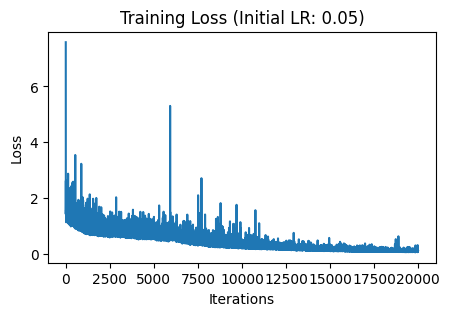

photo post predict:
training data
MSE : 0.09109991597289967
MAE : 0.19915679064801373
MAPE 9.24%
validation data
MSE : 4.07243254040268
MAE : 1.3837217870750018
MAPE 31.66%
training data
Loss after iteration 0: 2.383105369801569
Loss after iteration 10000: 0.46334074987122886


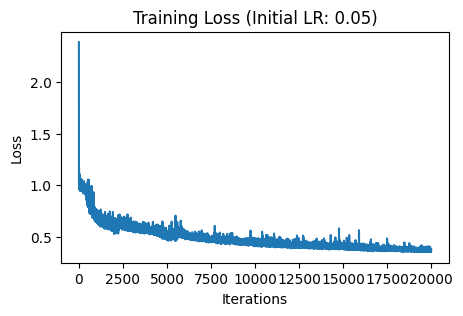

photo post predict:
training data
MSE : 0.372016732852265
MAE : 0.43628782715528225
MAPE 16.48%
validation data
MSE : 0.88000155856908
MAE : 0.549886519360555
MAPE 21.31%
training data
Loss after iteration 0: 3.5737491044902656
Loss after iteration 10000: 0.5183170688166303


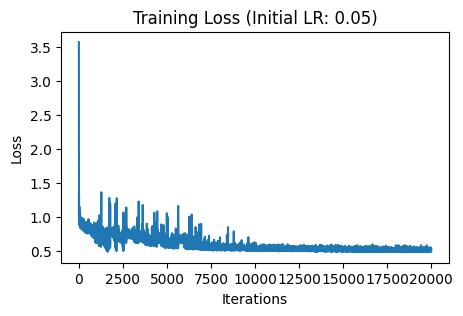

photo post predict:
training data
MSE : 0.5149820066749226
MAE : 0.5324748557163856
MAPE 15.67%
validation data
MSE : 0.6789946786565964
MAE : 0.5849777492159871
MAPE 15.14%
training data
Loss after iteration 0: 26.93498297973548
Loss after iteration 10000: 0.27341300508878846


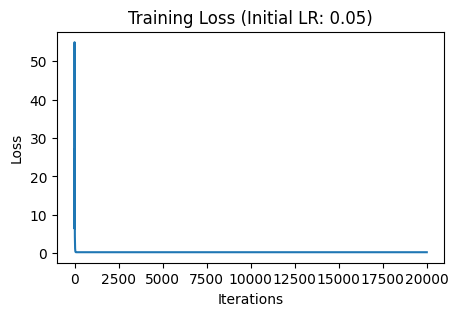

photo post predict:
training data
MSE : 0.27341300508878846
MAE : 0.4158755471473301
MAPE 8.57%
validation data
MSE : 1.9541751560651426
MAE : 0.9530525289127767
MAPE 19.64%
training data
Loss after iteration 0: 32.30162834419019
Loss after iteration 10000: 0.3198420262497871


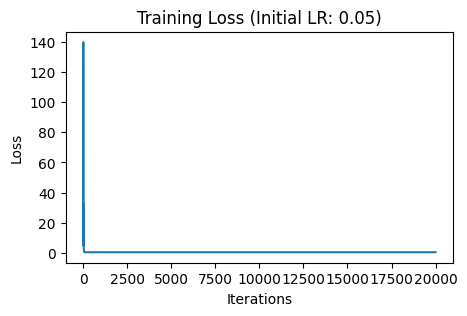

photo post predict:
training data
MSE : 0.31984202624978714
MAE : 0.5050274284424183
MAPE 9.57%
validation data
MSE : 0.16997411819992125
MAE : 0.3684017396951136
MAPE 6.98%
training data
Loss after iteration 0: 2.797654910106583
Loss after iteration 10000: 0.2207136490644494


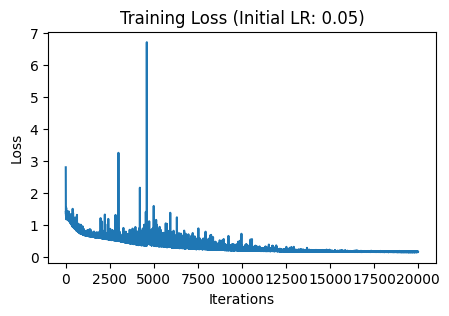

photo post predict:
training data
MSE : 0.1383931977478569
MAE : 0.20027099773986395
MAPE 20.86%
validation data
MSE : 4.119500958014371
MAE : 1.5236324004799826
MAPE 86.43%
training data
Loss after iteration 0: 2.1239640477387858
Loss after iteration 10000: 0.41153781624487207


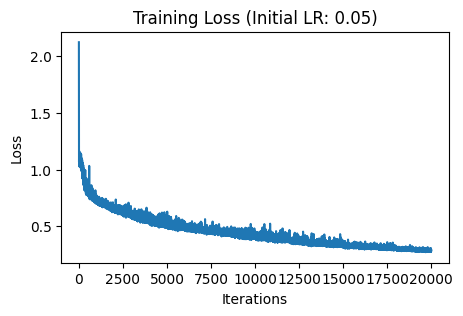

photo post predict:
training data
MSE : 0.2753775686061744
MAE : 0.3362239334681319
MAPE 13.05%
validation data
MSE : 1.1691918015617364
MAE : 0.7249681635069772
MAPE 19.41%
training data
Loss after iteration 0: 2.224454814646112
Loss after iteration 10000: 0.38047088821828257


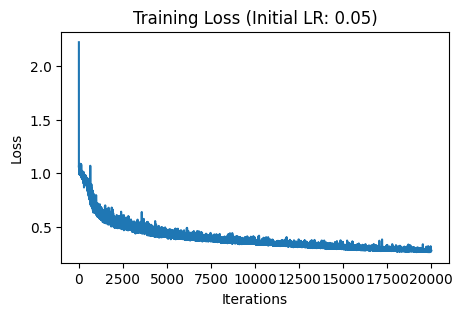

photo post predict:
training data
MSE : 0.2717752003963835
MAE : 0.3402366358263831
MAPE 12.13%
validation data
MSE : 0.9635929879690763
MAE : 0.660744215369561
MAPE 18.16%
training data
Loss after iteration 0: 4.945510799051792
Loss after iteration 10000: 0.25432566913515886


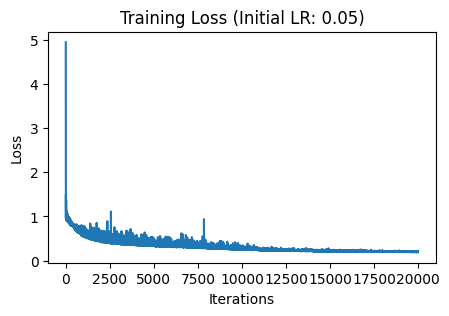

photo post predict:
training data
MSE : 0.2077355327280446
MAE : 0.3124606901264421
MAPE 9.50%
validation data
MSE : 0.8536408323553547
MAE : 0.6092637740897813
MAPE 17.80%
training data
Loss after iteration 0: 17.404806134431226
Loss after iteration 10000: 0.3360351642883828


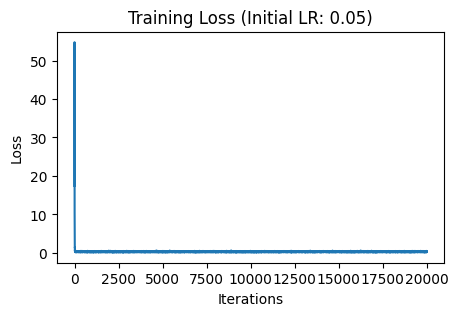

photo post predict:
training data
MSE : 0.28330003174630025
MAE : 0.41269913533964125
MAPE 8.26%
validation data
MSE : 1.5757280585955662
MAE : 0.9533398626246261
MAPE 19.08%
training data
Loss after iteration 0: 1.876750982276353
Loss after iteration 10000: 0.3206076019615431


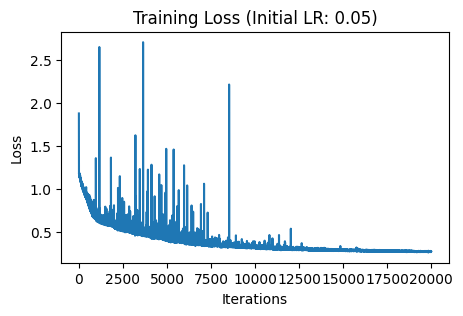

photo post predict:
training data
MSE : 0.2660304688134144
MAE : 0.31047740397495505
MAPE 45.12%
validation data
MSE : 2.126650776707196
MAE : 1.1233671309831483
MAPE 146.13%
training data
Loss after iteration 0: 1.7594279923308311
Loss after iteration 10000: 0.9750727725305137


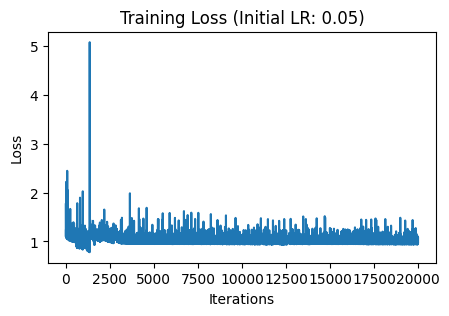

photo post predict:
training data
MSE : 0.998807179579283
MAE : 0.7581074611746003
MAPE 31.74%
validation data
MSE : 0.5573675882567596
MAE : 0.48784710323349095
MAPE 15.68%
training data
Loss after iteration 0: 1.8782443998310527
Loss after iteration 10000: 0.4349748039988542


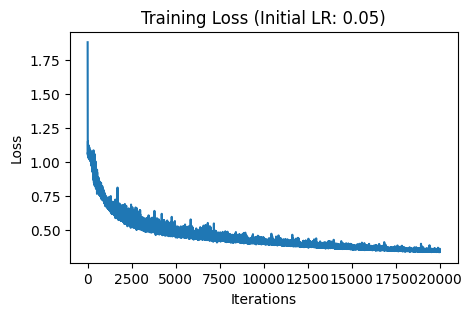

photo post predict:
training data
MSE : 0.34730341791064906
MAE : 0.40860763079656465
MAPE 14.37%
validation data
MSE : 1.1879707350996802
MAE : 0.8261145517712432
MAPE 51.30%
training data
Loss after iteration 0: 2.1239188326839367
Loss after iteration 10000: 0.4386864085448712


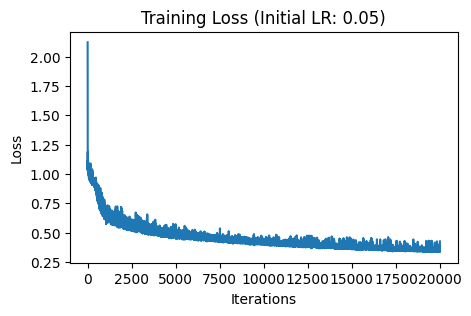

photo post predict:
training data
MSE : 0.3463303434721062
MAE : 0.42141711780219465
MAPE 15.73%
validation data
MSE : 0.990578424390717
MAE : 0.6788315426006417
MAPE 19.67%
training data
Loss after iteration 0: 5.021621852344974
Loss after iteration 10000: 0.3392677012677772


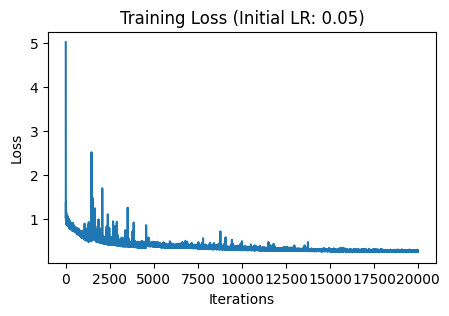

photo post predict:
training data
MSE : 0.2629157991885278
MAE : 0.3687624991986419
MAPE 10.91%
validation data
MSE : 0.8486134919683976
MAE : 0.6847356471251493
MAPE 26.41%
training data
Loss after iteration 0: 2.6928432678504426
Loss after iteration 10000: 0.3804082840908643


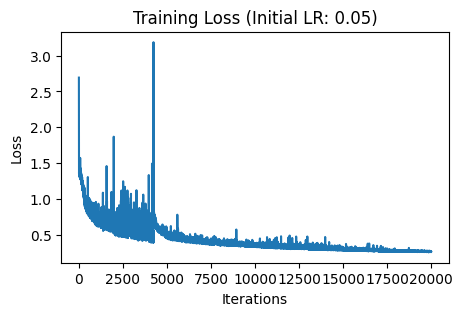

photo post predict:
training data
MSE : 0.2589877890388617
MAE : 0.30770205885060353
MAPE 17.21%
validation data
MSE : 1.0924712055850077
MAE : 0.7498829353475006
MAPE 23.60%
training data
Loss after iteration 0: 2.0583412900576126
Loss after iteration 10000: 0.42687222174122913


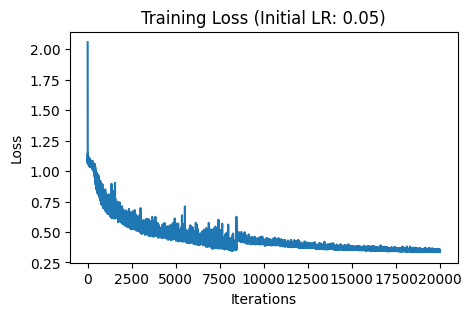

photo post predict:
training data
MSE : 0.3356509593174703
MAE : 0.3759982180571614
MAPE 13.36%
validation data
MSE : 0.8320222503813675
MAE : 0.5994837717919352
MAPE 18.36%
training data
Loss after iteration 0: 2.6569255281285553
Loss after iteration 10000: 0.37497409649193647


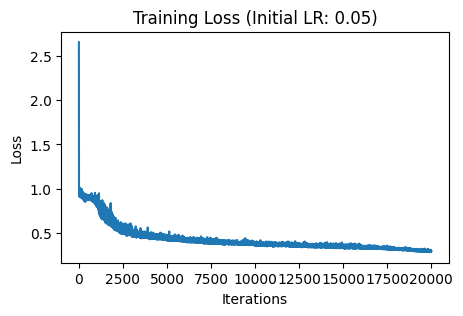

photo post predict:
training data
MSE : 0.28991486879990425
MAE : 0.36199966005482953
MAPE 11.75%
validation data
MSE : 0.9996941655887505
MAE : 0.7104721254854826
MAPE 19.81%
training data
Loss after iteration 0: 14.243334368532572
Loss after iteration 10000: 0.37110279430892673


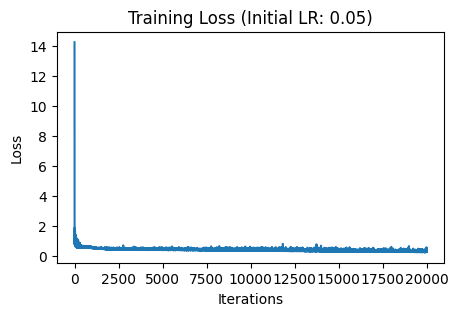

photo post predict:
training data
MSE : 0.3270632717469685
MAE : 0.4589774791748513
MAPE 10.74%
validation data
MSE : 1.078396080017704
MAE : 0.8050750040533167
MAPE 18.49%
training data
Loss after iteration 0: 1.9215211491819915
Loss after iteration 10000: 0.3841619447771065


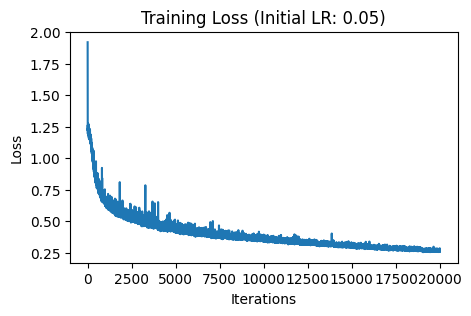

photo post predict:
training data
MSE : 0.33056121538108135
MAE : 0.4078653223053978
MAPE 36.23%
validation data
MSE : 1.816441769092459
MAE : 0.9367359127474654
MAPE 29.77%
training data
Loss after iteration 0: 1.8805983391333312
Loss after iteration 10000: 0.3644181862211522


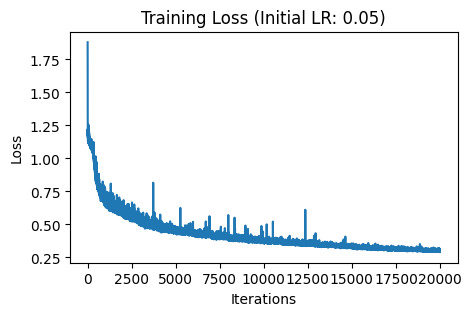

photo post predict:
training data
MSE : 0.3259271284938457
MAE : 0.3887394954255214
MAPE 16.25%
validation data
MSE : 1.0622440562108522
MAE : 0.6942625131883101
MAPE 20.56%
training data
Loss after iteration 0: 2.005258044003076
Loss after iteration 10000: 0.42738114682361195


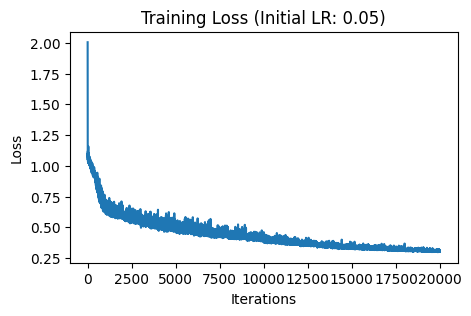

photo post predict:
training data
MSE : 0.2968567534039766
MAE : 0.3577489337196267
MAPE 12.50%
validation data
MSE : 1.150575621730626
MAE : 0.7904679055777079
MAPE 25.03%
training data
Loss after iteration 0: 2.835224942588623
Loss after iteration 10000: 0.3619173516823084


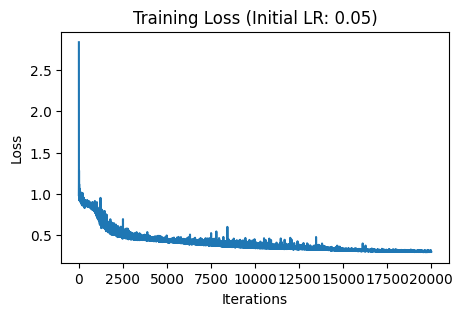

photo post predict:
training data
MSE : 0.29638980776111123
MAE : 0.3595733226227011
MAPE 11.39%
validation data
MSE : 0.9799850242763463
MAE : 0.7191035745203515
MAPE 19.64%
training data
Loss after iteration 0: 1.7788646501102447
Loss after iteration 10000: 0.4166199735976229


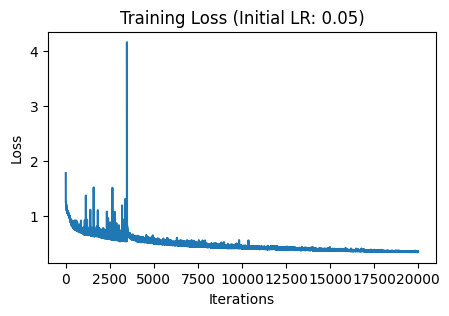

photo post predict:
training data
MSE : 0.3547448679247671
MAE : 0.4012120572335581
MAPE 98.77%
validation data
MSE : 1.5911598409968617
MAE : 0.8882428723674847
MAPE 325.12%
training data
Loss after iteration 0: 1.6163921442383111
Loss after iteration 10000: 0.41350043785189056


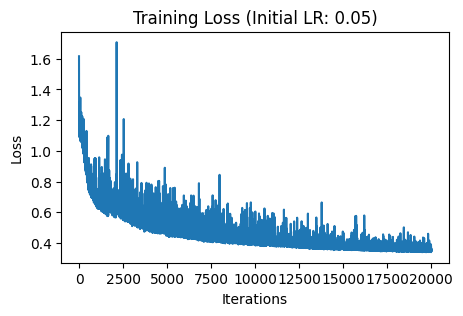

photo post predict:
training data
MSE : 0.3596873674769631
MAE : 0.39442862995010197
MAPE 23.34%
validation data
MSE : 1.1554325044164802
MAE : 0.8921283168881403
MAPE 40.50%
training data
Loss after iteration 0: 1.9753549397547814
Loss after iteration 10000: 0.3574567133969052


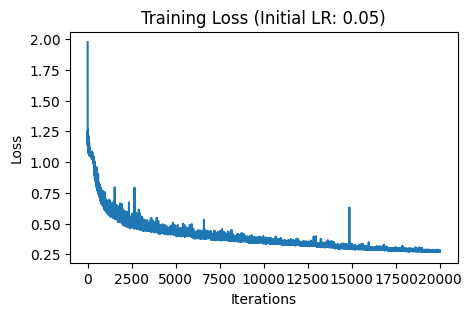

photo post predict:
training data
MSE : 0.3004260904271277
MAE : 0.4028541311149498
MAPE 16.82%
validation data
MSE : 1.0786613636100815
MAE : 0.7202547177332739
MAPE 21.76%
training data
Loss after iteration 0: 2.017092683244545
Loss after iteration 10000: 0.44033157783371785


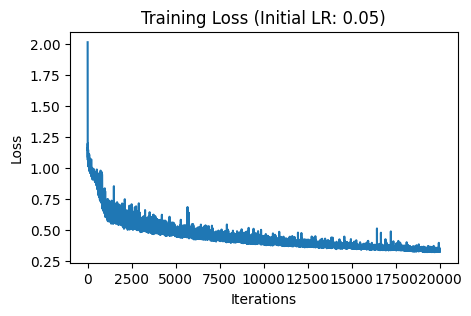

photo post predict:
training data
MSE : 0.47749737940778636
MAE : 0.4667334052012123
MAPE 15.16%
validation data
MSE : 1.1825702590077547
MAE : 0.7607183078117652
MAPE 25.54%
training data
Loss after iteration 0: 5.442231825705578
Loss after iteration 10000: 0.24292421514214782
Loss after iteration 20000: 0.12920635838145517
Loss after iteration 30000: 0.10264627119588872
Loss after iteration 40000: 0.09500172555522579


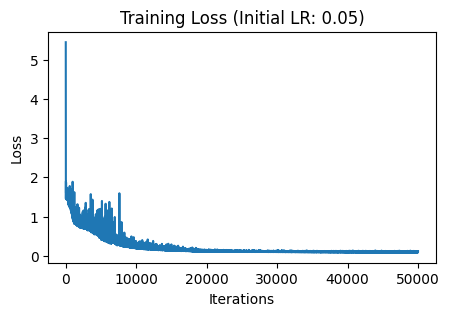

video post predict:
training data
MSE : 3.041828930039825
MAE : 1.265059992246472
MAPE 24067.34%
validation data
MSE : 3.5954892011908948
MAE : 1.354495712511589
MAPE 2058.30%
training data
Loss after iteration 0: 4.144219671337959
Loss after iteration 10000: 0.598919636318504
Loss after iteration 20000: 0.43069413160408515
Loss after iteration 30000: 0.39340949340684944
Loss after iteration 40000: 0.38406177193139496


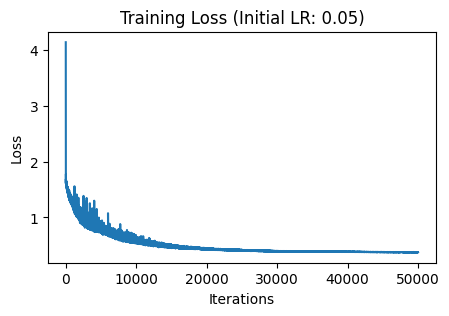

video post predict:
training data
MSE : 3.0043741711213374
MAE : 1.3185981551828831
MAPE 64653.37%
validation data
MSE : 2.9447034210762313
MAE : 1.3653701098297177
MAPE 8010.15%
training data
Loss after iteration 0: 6.0995942881092216
Loss after iteration 10000: 1.0288861777644152
Loss after iteration 20000: 0.7859480279430027
Loss after iteration 30000: 0.7555989119384979
Loss after iteration 40000: 0.7494123996654173


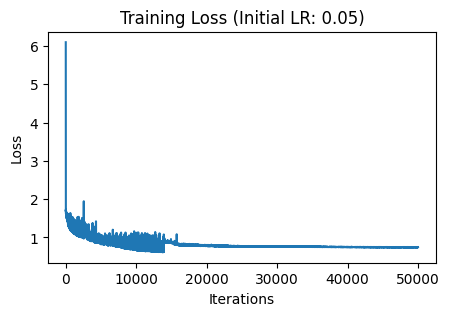

video post predict:
training data
MSE : 2.6621809695371828
MAE : 1.180613495985007
MAPE 42005.29%
validation data
MSE : 3.7268622014698596
MAE : 1.4697398400618913
MAPE 12300.81%
training data
Loss after iteration 0: 24.248091491647607
Loss after iteration 10000: 0.8845229418703292
Loss after iteration 20000: 0.8515948854601112
Loss after iteration 30000: 0.8358633613999112
Loss after iteration 40000: 0.947931072202252


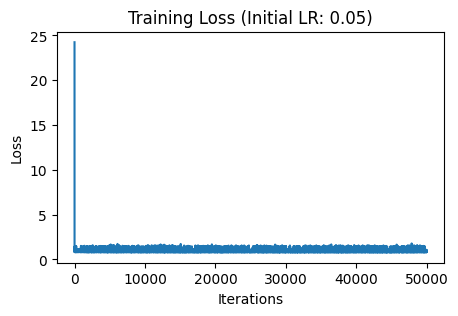

video post predict:
training data
MSE : 0.8812245575506978
MAE : 0.757015077305614
MAPE 4369.70%
validation data
MSE : 0.5716605351916896
MAE : 0.5891421014726549
MAPE 841.41%
training data
Loss after iteration 0: 2.0622823792491407
Loss after iteration 10000: 0.43410303340504264
Loss after iteration 20000: 0.3560948736350612
Loss after iteration 30000: 0.3087531650288872
Loss after iteration 40000: 0.2991880020690373


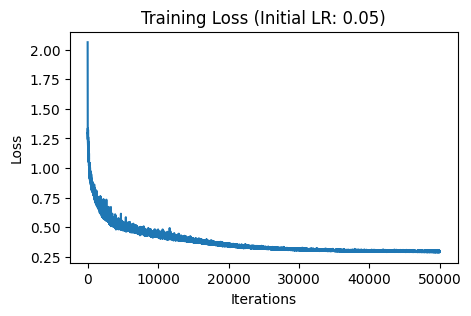

video post predict:
training data
MSE : 3.7008826567075968
MAE : 1.503373076711906
MAPE 1041832.09%
validation data
MSE : 23.82304923849748
MAE : 3.4923186173564145
MAPE 133438.77%
training data
Loss after iteration 0: 3.799159669037472
Loss after iteration 10000: 1.6740427484053717
Loss after iteration 20000: 1.6777154105082612
Loss after iteration 30000: 1.7170209824599627
Loss after iteration 40000: 1.7025616798772547


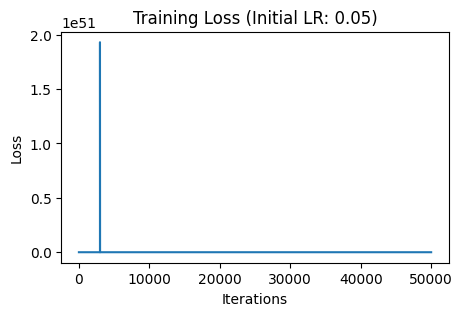

video post predict:
training data
MSE : 1.6819140727818926
MAE : 0.9778882355118592
MAPE 26321.69%
validation data
MSE : 1.8435502492418034
MAE : 1.0648527574458135
MAPE 7152.62%
training data
Loss after iteration 0: 3.871978190658015
Loss after iteration 10000: 0.853397868844825
Loss after iteration 20000: 0.7123369675422084
Loss after iteration 30000: 0.6695045656631056
Loss after iteration 40000: 0.6537561581136005


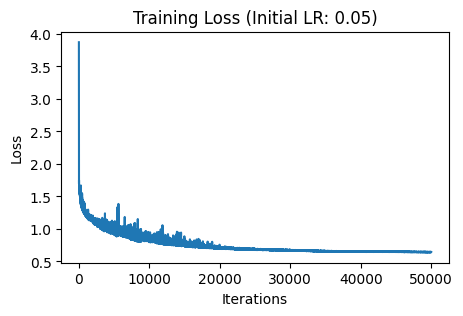

video post predict:
training data
MSE : 2.8247114009888445
MAE : 1.23692942369402
MAPE 87383.80%
validation data
MSE : 3.159415086838368
MAE : 1.389124329087304
MAPE 18429.33%
training data
Loss after iteration 0: 5.607115705795947
Loss after iteration 10000: 0.8218314814438764
Loss after iteration 20000: 0.7957475473737602
Loss after iteration 30000: 0.785654960786461
Loss after iteration 40000: 0.7837013188275659


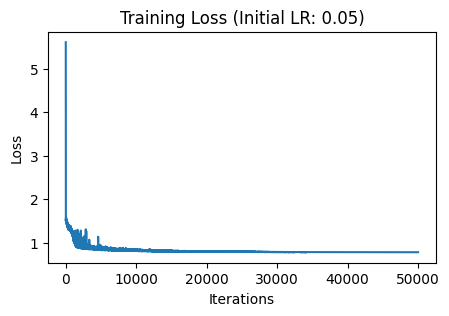

video post predict:
training data
MSE : 2.3521943531446916
MAE : 1.1118529470871807
MAPE 45488.06%
validation data
MSE : 3.10541906719828
MAE : 1.3408235186294792
MAPE 9462.15%
training data
Loss after iteration 0: 1.5244191992333442
Loss after iteration 10000: 0.4515489621023596
Loss after iteration 20000: 0.3883492640221702
Loss after iteration 30000: 0.36535851072737235
Loss after iteration 40000: 0.35561900995322093


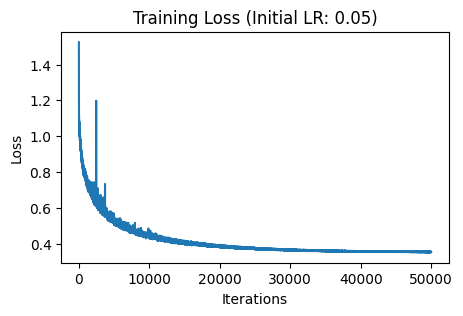

video post predict:
training data
MSE : 2.7647922155670286
MAE : 1.26087769321145
MAPE 302516.98%
validation data
MSE : 6.177343023333769
MAE : 2.0080690363447453
MAPE 23043494.76%
training data
Loss after iteration 0: 3.2129039744813306
Loss after iteration 10000: 0.6488598846663174
Loss after iteration 20000: 0.526710469290177
Loss after iteration 30000: 0.4889577396010318
Loss after iteration 40000: 0.4692532015708117


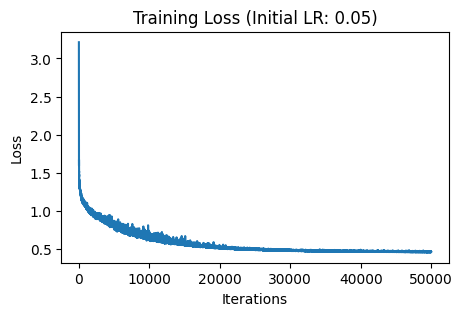

video post predict:
training data
MSE : 5.730269581414061
MAE : 1.9461024617085936
MAPE 427070.19%
validation data
MSE : 4.3232570343926975
MAE : 1.6145158634338175
MAPE 22909.78%
training data
Loss after iteration 0: 3.708890013287402
Loss after iteration 10000: 0.8783457559117096
Loss after iteration 20000: 0.8224400971602488
Loss after iteration 30000: 0.7843879694346649
Loss after iteration 40000: 0.7689873685853837


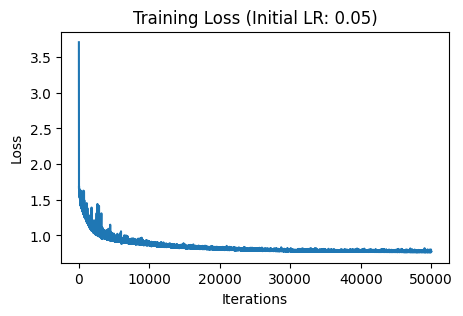

video post predict:
training data
MSE : 2.701233051668349
MAE : 1.2173836314074669
MAPE 112162.88%
validation data
MSE : 3.2837524070002497
MAE : 1.4026987903957167
MAPE 20198.99%
training data
Loss after iteration 0: 3.7354380722230234
Loss after iteration 10000: 0.7448135605793091
Loss after iteration 20000: 0.6411961982438306
Loss after iteration 30000: 0.6049477686903705
Loss after iteration 40000: 0.5808131388546613


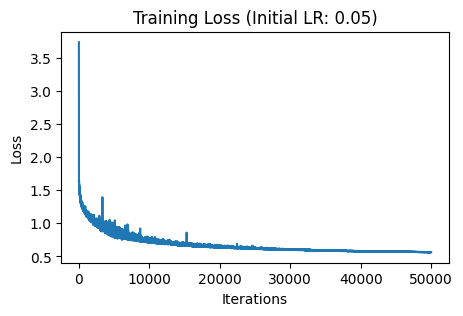

video post predict:
training data
MSE : 2.7758002380801776
MAE : 1.2222967064608863
MAPE 105651.70%
validation data
MSE : 3.607570398106585
MAE : 1.4729404799841719
MAPE 26808.08%
training data
Loss after iteration 0: 2.4112038987373428
Loss after iteration 10000: 0.20559683632389894
Loss after iteration 20000: 0.12894834271452654
Loss after iteration 30000: 0.10862255246887412
Loss after iteration 40000: 0.1001427160735704


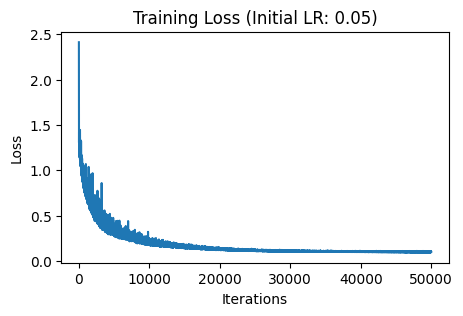

video post predict:
training data
MSE : 2.8295358428476045
MAE : 1.291455845235511
MAPE 43722.17%
validation data
MSE : 3.4416281327741793
MAE : 1.4951880220251392
MAPE 15373.22%
training data
Loss after iteration 0: 4.797660655593851
Loss after iteration 10000: 1.370172959655945
Loss after iteration 20000: 1.2166604997501926
Loss after iteration 30000: 1.1755150461329666
Loss after iteration 40000: 1.1399334013227609


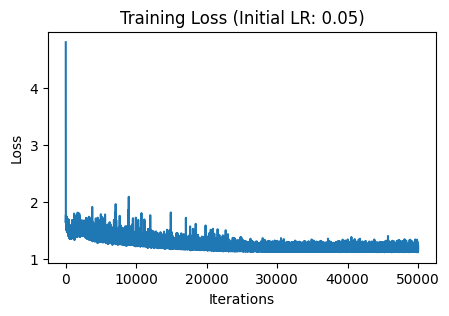

video post predict:
training data
MSE : 2.10106737486479
MAE : 1.0808828515017879
MAPE 18505.70%
validation data
MSE : 2.5367057415692815
MAE : 1.334003980083946
MAPE 4402.51%
training data
Loss after iteration 0: 4.26384467141092
Loss after iteration 10000: 1.1381014313343845
Loss after iteration 20000: 0.9249706594983764
Loss after iteration 30000: 0.7753381976488438
Loss after iteration 40000: 0.7391725556740191


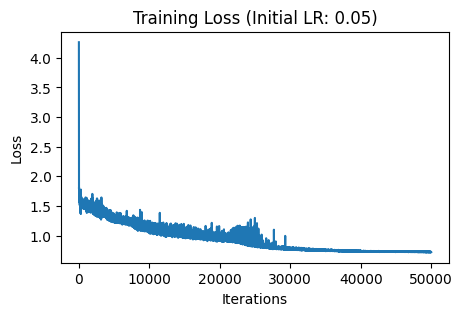

video post predict:
training data
MSE : 2.8279616994344052
MAE : 1.2257874739952637
MAPE 47145.62%
validation data
MSE : 3.9635002389971743
MAE : 1.5469985675323468
MAPE 12903.70%
training data
Loss after iteration 0: 11.173889361501006
Loss after iteration 10000: 0.8159812239285701
Loss after iteration 20000: 0.6801476502809458
Loss after iteration 30000: 0.6545977142806233
Loss after iteration 40000: 0.6630973271078098


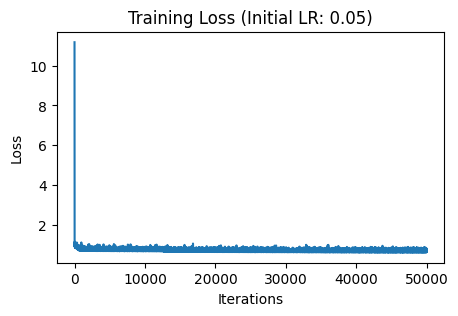

video post predict:
training data
MSE : 1.2320900578913387
MAE : 0.8355933626414537
MAPE 10398.14%
validation data
MSE : 1.2226864160127702
MAE : 0.8888004910377755
MAPE 2715.10%
training data
Loss after iteration 0: 1.1553548294466778
Loss after iteration 10000: 0.42864909798469164
Loss after iteration 20000: 0.38284328422791675
Loss after iteration 30000: 0.3606025788088365
Loss after iteration 40000: 0.35252016221495264


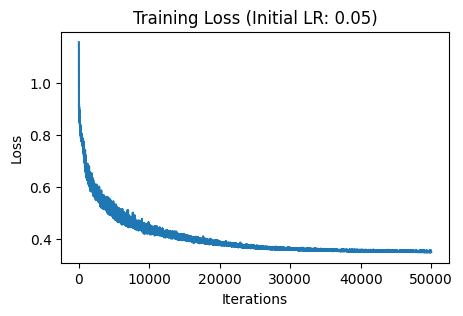

video post predict:
training data
MSE : 1.5979981637477956
MAE : 0.9879782008486703
MAPE 182466.91%
validation data
MSE : 3.470257202096055
MAE : 1.4701220884340518
MAPE 60925.42%
training data
Loss after iteration 0: 2.7356055824006575
Loss after iteration 10000: 0.47144547538588716
Loss after iteration 20000: 0.3304635656702106
Loss after iteration 30000: 0.29107965802927543
Loss after iteration 40000: 0.27912615725151413


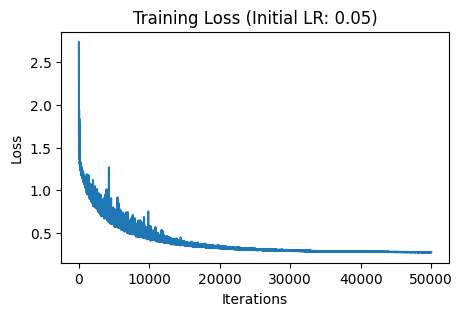

video post predict:
training data
MSE : 5.061451501049345
MAE : 1.8182119993060568
MAPE 120658.13%
validation data
MSE : 4.601133300590398
MAE : 1.7842142306049174
MAPE 12527.69%
training data
Loss after iteration 0: 3.5724776536291643
Loss after iteration 10000: 1.7511188295866624
Loss after iteration 20000: 1.8041021730320765
Loss after iteration 30000: 1.7445136928118654
Loss after iteration 40000: 1.7812316591194512


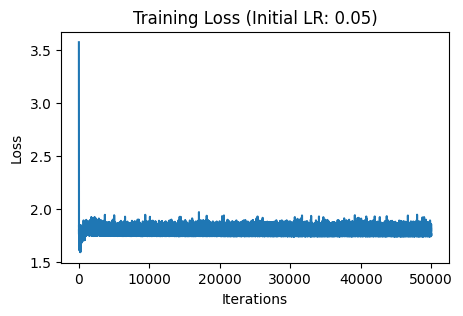

video post predict:
training data
MSE : 1.782341283556296
MAE : 0.9746627646038858
MAPE 38052.75%
validation data
MSE : 2.4712525101108582
MAE : 1.2047380273396477
MAPE 11725.51%
training data
Loss after iteration 0: 4.318427594199494
Loss after iteration 10000: 1.5460064697824338
Loss after iteration 20000: 1.54972340179588
Loss after iteration 30000: 1.5410918259654702
Loss after iteration 40000: 1.5453333722592724


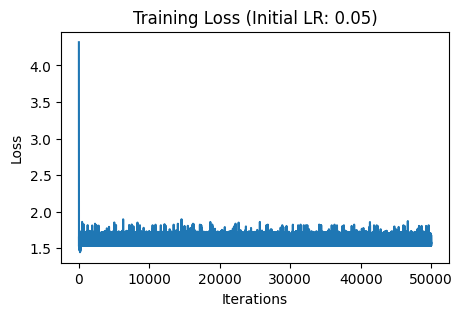

video post predict:
training data
MSE : 1.5672790981533364
MAE : 0.8987321268304892
MAPE 33324.09%
validation data
MSE : 2.4207983262274833
MAE : 1.1673001561041065
MAPE 10798.97%
training data
Loss after iteration 0: 1.1184446825708785
Loss after iteration 10000: 0.4811032826589662
Loss after iteration 20000: 0.39952573919954015
Loss after iteration 30000: 0.370940481448455
Loss after iteration 40000: 0.36277631830493917


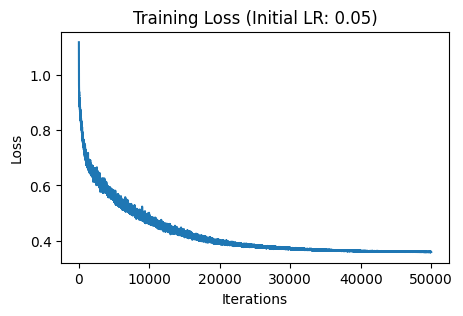

video post predict:
training data
MSE : 1.6217490893530104
MAE : 0.9994153580349486
MAPE 383296.94%
validation data
MSE : 2.966742543085537
MAE : 1.3460098336061694
MAPE 86091.61%
training data
Loss after iteration 0: 1.7477394236468615
Loss after iteration 10000: 2.151504448713326
Loss after iteration 20000: 2.154263908491146
Loss after iteration 30000: 2.1555741504756796
Loss after iteration 40000: 2.151149068968192


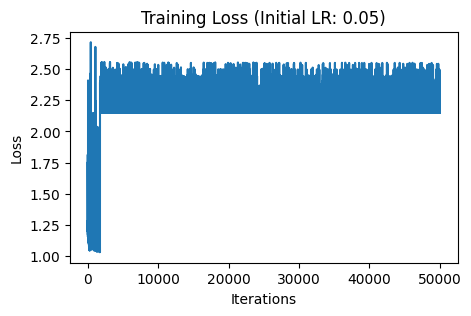

video post predict:
training data
MSE : 2.1900496853555853
MAE : 1.189211998689447
MAPE 100915.67%
validation data
MSE : 4.517482392343605
MAE : 1.8770382941501589
MAPE 39797.11%
training data
Loss after iteration 0: 3.2162265946168422
Loss after iteration 10000: 0.8052238605777211
Loss after iteration 20000: 0.7205816577520898
Loss after iteration 30000: 0.6987528862827138
Loss after iteration 40000: 0.6903840951070828


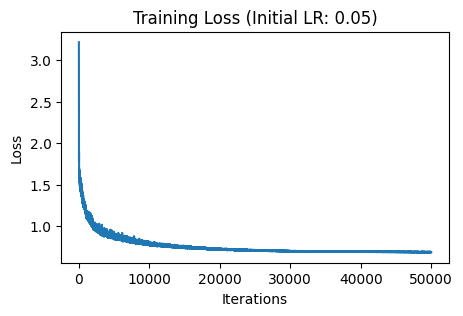

video post predict:
training data
MSE : 4.473705179087998
MAE : 1.6610307430942324
MAPE 155928.40%
validation data
MSE : 2.8961723943375848
MAE : 1.3362635582219216
MAPE 21944.15%
training data
Loss after iteration 0: 3.448657878885462
Loss after iteration 10000: 1.0432178378243593
Loss after iteration 20000: 0.9908169010124697
Loss after iteration 30000: 0.9921217750707922
Loss after iteration 40000: 0.972812373818


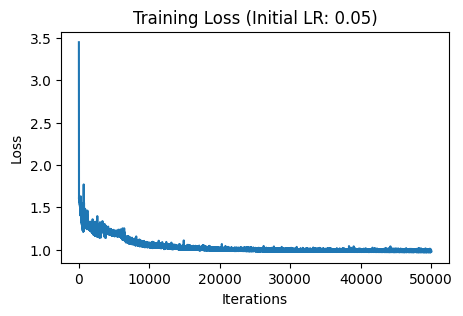

video post predict:
training data
MSE : 2.294464773809825
MAE : 1.1303235015905306
MAPE 67156.47%
validation data
MSE : 2.7951426317520203
MAE : 1.3089890011313552
MAPE 17770.28%


In [37]:
for i in td_pic_try:
    x_train_isPhoto, y_train_isPhoto, x_val_isPhoto, y_val_isPhoto = split_data(i[:, :-1], i[:, -1].reshape(-1, 1), split_ratio=0.2)
    print("training data")
    loss_function = "mse";
    layers_dims = [x_train_isPhoto.shape[-1], 32, 16, 1] # linear for converge, sigmoid for diverge
    activation_fn = ["relu", "relu", "linear"]
    learning_rate = 0.05
    num_iterations = 20000
    print_loss = True
    print_freq = 10000
    decrease_freq = 1000
    decrease_proportion = 0.9
    batch_size = 64

    model_isPhoto = Model(layers_dims, activation_fn, loss_function)
    model_isPhoto, losses, history = train_model(
        model_isPhoto, x_train_isPhoto, y_train_isPhoto, learning_rate, num_iterations,
        batch_size, print_loss, print_freq, decrease_freq, decrease_proportion
    )

    # Plot the loss
    plt.figure(figsize=(5, 3))
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training Loss (Initial LR: {learning_rate})')
    plt.show()

    print("photo post predict:")
    print("training data")
    pred_train = predict(x_train_isPhoto, y_train_isPhoto, model_isPhoto)
    pic_train_MAPEs.append(pred_train)
    print("validation data")
    pred_val = predict(x_val_isPhoto, y_val_isPhoto, model_isPhoto)
    pic_val_MAPEs.append(pred_val)
    # print(pic_train_MAPEs)
    # print(pic_val_MAPEs)

for i in td_vid_try:
    x_train_isVideo, y_train_isVideo, x_val_isVideo, y_val_isVideo = split_data(i[:, :-1], i[:, -1].reshape(-1, 1), split_ratio=0.2)
    print("training data")
    loss_function = "mse";
    layers_dims = [x_train_isVideo.shape[-1], 32, 16, 1] # linear for converge, sigmoid for diverge
    activation_fn = ["relu", "relu", "linear"]
    learning_rate = 0.05
    num_iterations = 50000
    print_loss = True
    print_freq = 10000
    decrease_freq = 1000
    decrease_proportion = 0.9
    batch_size = 32

    model_isVideo = Model(layers_dims, activation_fn, loss_function)
    model_isVideo, losses, history = train_model(
        model_isVideo, x_train_isVideo, y_train_isVideo, learning_rate, num_iterations,
        batch_size, print_loss, print_freq, decrease_freq, decrease_proportion
    )

    # Plot the loss
    plt.figure(figsize=(5, 3))
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training Loss (Initial LR: {learning_rate})')
    plt.show()
    print("video post predict:")
    x_train_isVideo, y_train_isVideo, x_val_isVideo, y_val_isVideo = split_data(i[:, :-1], i[:, -1], split_ratio=0.2)
    print("training data")
    pred_train = predict(x_train_isVideo, y_train_isVideo, model_isVideo)
    vid_train_MAPEs.append(pred_train)
    print("validation data")
    pred_val = predict(x_val_isVideo, y_val_isVideo, model_isVideo)
    vid_val_MAPEs.append(pred_val)
    # print(vid_train_MAPEs)
    # print(vid_val_MAPEs)

In [38]:
# print("photo post predict:")
# print("training data")
# pred_train = predict(x_train_isPhoto, y_train_isPhoto, model_isPhoto)
# print("validation data")
# pred_val = predict(x_val_isPhoto, y_val_isPhoto, model_isPhoto)
# print("video post predict:")
# print("training data")
# pred_train = predict(x_train_isVideo, y_train_isVideo, model_isVideo)
# print("validation data")
# pred_val = predict(x_val_isVideo, y_val_isVideo, model_isVideo)
# # save_final_result(model, x_train, y_train)
# # animate_training(history, x_train, y_train)

In [39]:
df = pd.DataFrame({
    'ID': range(len(pred_train)),
    'Label': pred_train.flatten()
})

df.to_csv('training_output.csv', index=False)
print("Prediction data saved as 'training_output.csv'")

Prediction data saved as 'training_output.csv'
